# VOIS Project1 : AirBNB 


## Name: Tushar Srivastava
*INTERNSHIP_17546440516895be537820f*

### Importing the Needed Libraries

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



### Loading the Dataset

In [45]:
# Loading the datset using pandas.read_excel() function
db = pd.read_excel('1730285881-Airbnb_Open_Data.xlsx')

### Details of Dataset

In [46]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [47]:
db.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [48]:
print("The shape of the dataset is:", db.shape)
print("No.of Rows in the dataset:",db.shape[0])
print("No.of Rows in the dataset:",db.shape[1])



The shape of the dataset is: (102599, 26)
No.of Rows in the dataset: 102599
No.of Rows in the dataset: 26


In [49]:
print("The columns in the dataset are:", db.columns)

The columns in the dataset are: Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')


In [50]:
db.duplicated()   

0         False
1         False
2         False
3         False
4         False
          ...  
102594     True
102595     True
102596     True
102597     True
102598     True
Length: 102599, dtype: bool

In [51]:
# removing the dupliacte values
db.drop_duplicates(inplace=True)

### Dataset Stats/Description

In [52]:
db.describe()

,id,host id,lat,long,instant_bookable,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,1.020580e+05,1.020580e+05,102050.000000,102050.000000,101953.000000,101844.000000,101811.000000,101785.000000,101658.000000,101875.000000,86226,86240.000000,101739.000000,101739.000000,101610.000000
mean,2.918438e+07,4.926738e+10,40.728097,-73.949652,0.497945,2012.488090,625.355580,125.039249,8.126640,27.517948,2019-06-11 02:12:22.996312064,1.375408,3.278733,7.936937,141.043992
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,0.000000,2003.000000,50.000000,10.000000,-1223.000000,0.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,1.509286e+07,2.459924e+10,40.688730,-73.982580,0.000000,2007.000000,340.000000,68.000000,2.000000,1.000000,2018-10-27 00:00:00,0.220000,2.000000,1.000000,3.000000
50%,2.918438e+07,4.912865e+10,40.722290,-73.954440,0.000000,2012.000000,625.000000,125.000000,3.000000,7.000000,2019-06-13 00:00:00,0.740000,3.000000,1.000000,96.000000
75%,4.327590e+07,7.400619e+10,40.762760,-73.932350,1.000000,2017.000000,913.000000,183.000000,5.000000,31.000000,2019-07-05 00:00:00,2.010000,4.000000,2.000000,268.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,1.000000,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2058-06-16 00:00:00,90.000000,5.000000,332.000000,3677.000000
std,1.627173e+07,2.853742e+10,0.055852,0.049502,0.499998,5.765838,331.672649,66.325905,30.616698,49.571744,NaN,1.748019,1.285089,32.266355,135.429156


## Data Cleaning

### Null Report of the Dataset

In [53]:
print("Nulls present in the dataset column wise")
db.isnull().sum()

Nulls present in the dataset column wise


id                                     0
NAME                                 270
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       400
number of reviews                    183
last review                        15832
reviews per month                  15818
review rate number                   319
calculated host listings count       319
availability 365                     448
house_rules     

In [54]:
db[db['license'].isnull()]

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102053,57365208,Cozy bright room near Prospect Park,77326652202,unconfirmed,Mariam,Brooklyn,Flatbush,40.64945,-73.96108,United States,...,NaN,7.0,12.0,2019-03-27,0.44,5.0,1.0,0.0,Shoes off Clean After yourself Turn Lights and...,NaN
102054,57365760,Private Bedroom with Amazing Rooftop View,45936254757,verified,Trey,Brooklyn,Bushwick,40.69872,-73.92718,United States,...,NaN,1.0,19.0,2017-08-31,0.72,3.0,2.0,0.0,NaN,NaN
102055,57366313,Pretty Brooklyn One-Bedroom for 2 to 4 people,23801060917,verified,Michael,Brooklyn,Bedford-Stuyvesant,40.67810,-73.90822,United States,...,NaN,2.0,50.0,2019-06-26,3.12,4.0,2.0,235.0,* Check out: 10am * We made an effort to keep ...,NaN
102056,57366865,Room & private bathroom in historic Harlem,15593031571,unconfirmed,Shireen,Manhattan,Harlem,40.81248,-73.94317,United States,...,NaN,2.0,0.0,NaT,NaN,1.0,1.0,0.0,Each of us is working and/or going to school a...,NaN


In [56]:
#dropping the null value column from the dataset
db = db.drop('license', axis=1)
db= db.drop('house_rules', axis=1)

In [61]:
db.dropna(inplace=True)

In [62]:
#removing the ($) and (,) from the price and service fee column
#db['price']= db['price'].str.replace('$','', regex=False)
#db['service fee']= db['service fee'].str.replace('$','',regex=False)

#Changing the datatype of price and service fee column from object to float
db['price']= db['price'].astype(float)
db['service fee']= db['service fee'].astype(float)

db['id']= db['id'].astype(str)
db['host id']= db['host id'].astype(str)
db['last review']= pd.to_datetime(db['last review'])
db['Construction year']= db['Construction year'].astype(int)


In [63]:
db.loc[db['neighbourhood group']=='Brookln', 'neighbourhood group']='Brooklyn'

In [64]:
db = db.drop(db[db['availability 365']>500].index)

In [68]:
db.duplicated().value_counts()

False    83389
Name: count, dtype: int64

In [69]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83389 entries, 0 to 102040
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              83389 non-null  object        
 1   NAME                            83389 non-null  object        
 2   host id                         83389 non-null  object        
 3   host_identity_verified          83389 non-null  object        
 4   host name                       83389 non-null  object        
 5   neighbourhood group             83389 non-null  object        
 6   neighbourhood                   83389 non-null  object        
 7   lat                             83389 non-null  float64       
 8   long                            83389 non-null  float64       
 9   country                         83389 non-null  object        
 10  country code                    83389 non-null  object        
 11  instan

In [70]:
# new stats after cleaning the data
print("The shape of the dataset is:", db.shape)


The shape of the dataset is: (83389, 24)


In [71]:
db.describe()

,lat,long,instant_bookable,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,83389.000000,83389.000000,83389.000000,83389.000000,83389.000000,83389.000000,83389.000000,83389.000000,83389,83389.000000,83389.000000,83389.000000,83389.000000
mean,40.727349,-73.948502,0.497704,2012.487810,626.209668,125.243114,7.406109,32.261305,2019-06-08 21:32:53.396971008,1.377352,3.278694,7.032894,141.746369
min,40.504560,-74.249840,0.000000,2003.000000,50.000000,10.000000,-365.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.687640,-73.982110,0.000000,2007.000000,340.000000,68.000000,2.000000,3.000000,2018-10-25 00:00:00,0.220000,2.000000,1.000000,6.000000
50%,40.721320,-73.953710,0.000000,2012.000000,625.000000,125.000000,3.000000,11.000000,2019-06-13 00:00:00,0.740000,3.000000,1.000000,101.000000
75%,40.762600,-73.930800,1.000000,2017.000000,914.000000,183.000000,5.000000,38.000000,2019-07-05 00:00:00,2.010000,4.000000,2.000000,266.000000
max,40.916970,-73.705220,1.000000,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2022-05-21 00:00:00,90.000000,5.000000,332.000000,426.000000
std,0.056326,0.050342,0.499998,5.760526,331.803443,66.364212,28.105563,51.954290,NaN,1.751091,1.283678,29.555458,133.377544


### What are the different property types in a dataset

In [73]:

property_types = db['room type'].value_counts().to_frame()
property_types

,count
room type,
Entire home/apt,44161
Private room,37474
Shared room,1646
Hotel room,108


##### Visualizing the same

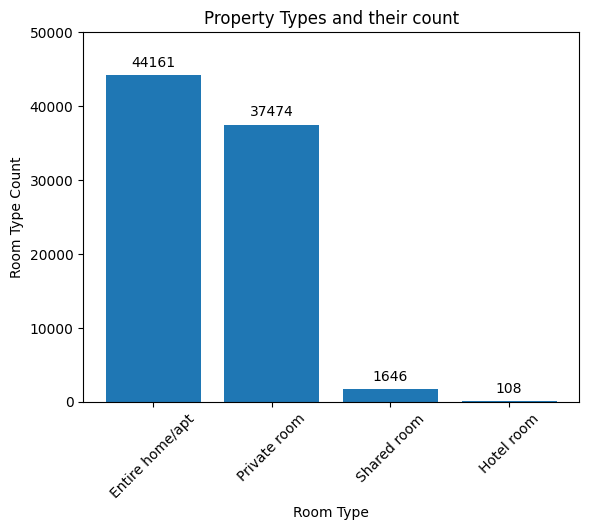

In [94]:
property_types_bar = plt.bar(property_types.index, property_types.loc[:,"count"])
plt.bar_label(property_types_bar, labels = property_types.loc[:,"count"], padding = 4)
plt.ylim([0, 50000])
plt.xlabel('Room Type')
plt.ylabel('Room Type Count')
plt.xticks(rotation = 45)
plt.title('Property Types and their count')
plt.show()

#### Which neighbourhood group has the highest number of listings?


In [95]:

neighbour = db['neighbourhood group'].value_counts().to_frame()
neighbour

,count
neighbourhood group,
Brooklyn,34621
Manhattan,34560
Queens,11124
Bronx,2267
Staten Island,816
brookln,1


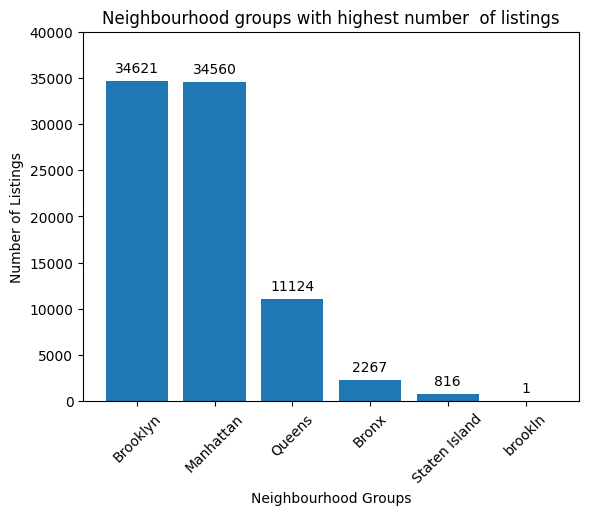

In [96]:
neighbour_bar = plt.bar(neighbour.index, neighbour.loc[:,"count"])
plt.bar_label(neighbour_bar, labels = neighbour.loc[:,"count"], padding = 4)
plt.ylim([0, 40000])
plt.xlabel('Neighbourhood Groups')
plt.ylabel('Number of Listings')
plt.xticks(rotation = 45)
plt.title('Neighbourhood groups with highest number  of listings')
plt.show()

#### Which neighbourhood group have the highest average prices for Airbnb listings?

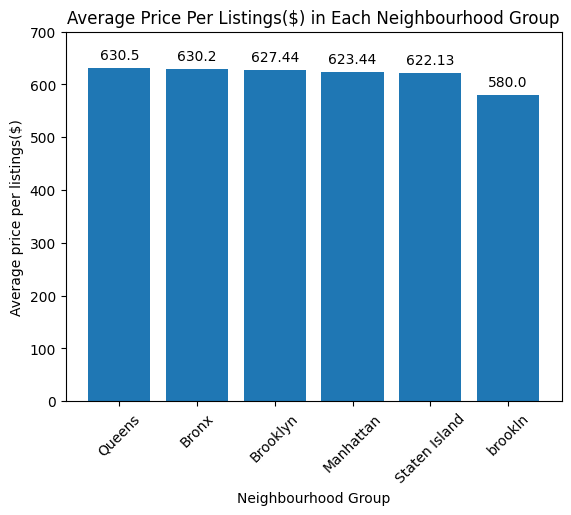

In [97]:

avg_price = db.groupby('neighbourhood group') ['price'].mean().sort_values(ascending = False).to_frame()
avg_price_bar = plt.bar(avg_price.index, avg_price.loc[:,'price'])
plt.bar_label(avg_price_bar, labels = round(avg_price.loc[:,'price'], 2), label_type = 'edge', padding = 4)
plt.ylim(0, 700)
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average price per listings($)')
plt.xticks(rotation = 45)
plt.title('Average Price Per Listings($) in Each Neighbourhood Group')
plt.show()

#### Is there a relationship between the construction year of property & price?

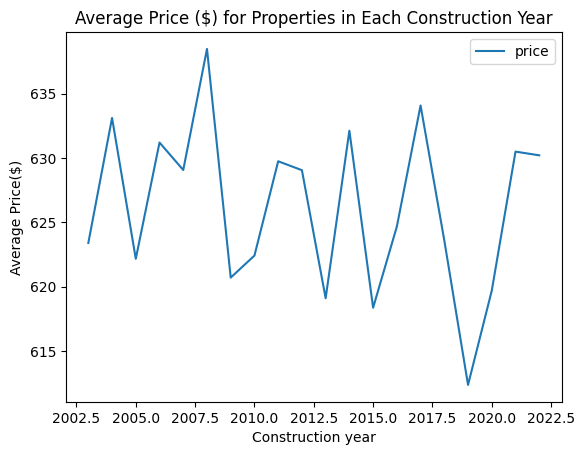

In [99]:

db.groupby(db['Construction year']) ['price'].mean().to_frame().plot()
plt.xlabel('Construction year')
plt.ylabel('Average Price($)')
plt.title('Average Price ($) for Properties in Each Construction Year')
plt.show()

#### Who are the top 10 hosts by calculated host listing count?

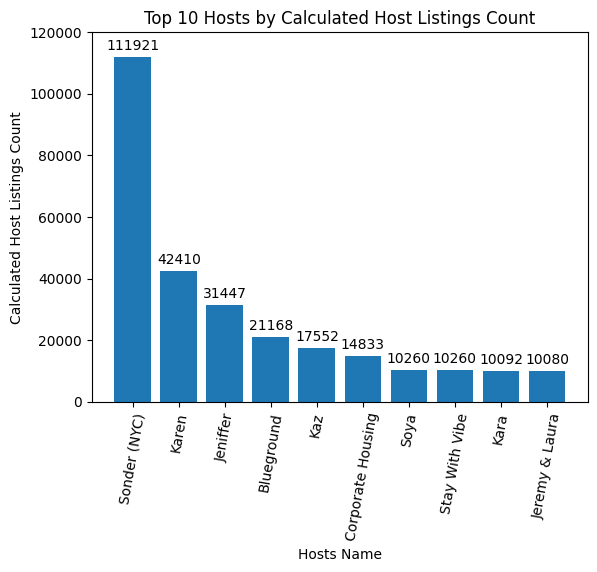

In [101]:

hosts = db.groupby('host name')['calculated host listings count'].sum().sort_values(ascending = False).nlargest(10).to_frame()
hosts_bar = plt.bar(hosts.index, hosts.loc[:,'calculated host listings count'])
plt.bar_label(hosts_bar, label = hosts.loc[:,'calculated host listings count'], label_type = 'edge', padding = 3)
plt.xlabel('Hosts Name')
plt.ylabel('Calculated Host Listings Count')
plt.xticks(rotation = 80)
plt.ylim([0, 120000])
plt.title('Top 10 Hosts by Calculated Host Listings Count')
plt.show()

#### Do hosts with verified identities more likely to receive positive reviews?


In [102]:
#Do hosts with verified identities more likely to receive positive reviews?
review = db.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending = False).to_frame()
review

,review rate number
host_identity_verified,
verified,3.284066
unconfirmed,3.273325


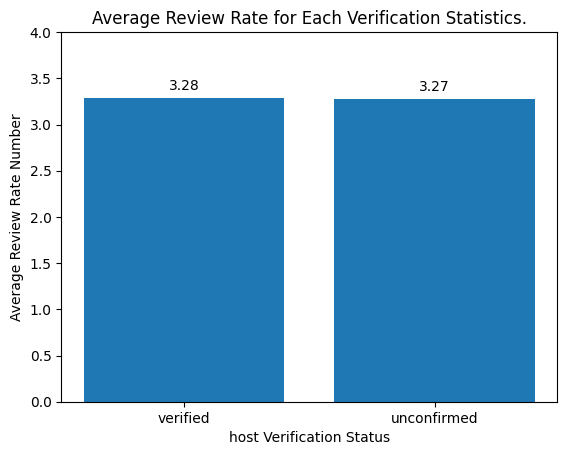

In [103]:
review_bar = plt.bar(review.index, review.loc[:,'review rate number'])
plt.bar_label(review_bar, labels = round(review.loc[:,'review rate number'], 2), padding = 4)
plt.ylim([0,4])
plt.xlabel('host Verification Status')
plt.ylabel('Average Review Rate Number')
plt.title('Average Review Rate for Each Verification Statistics.')
plt.show()

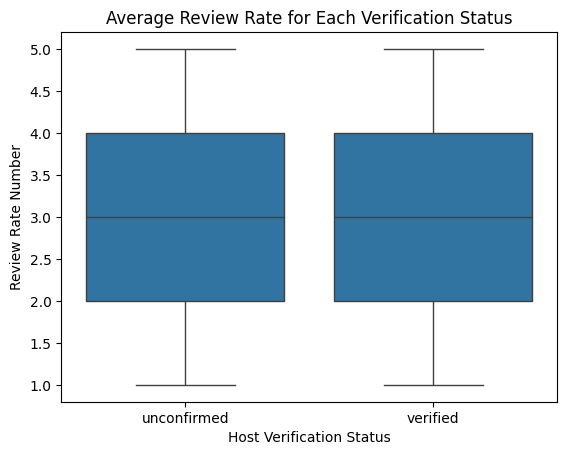

In [106]:
base_color = sns.color_palette()[0]
sns.boxplot(data = db, x = 'host_identity_verified', y = 'review rate number', color = base_color)
plt.xlabel('Host Verification Status')
plt.ylabel('Review Rate Number')
plt.title('Average Review Rate for Each Verification Status')
plt.show()

#### Is there a correlation between the price of a listing and its service fee?


In [ ]:
db['price'].corr(db['service fee'])

np.float64(0.9999909082976457)

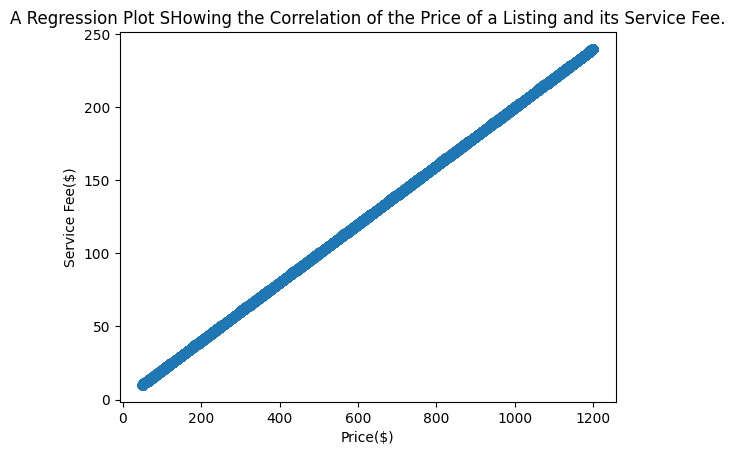

In [109]:
sns.regplot(db, x = 'price', y = 'service fee')
plt.xlabel('Price($)')
plt.ylabel('Service Fee($)')
plt.title('A Regression Plot SHowing the Correlation of the Price of a Listing and its Service Fee.')
plt.show()

#### What is the average review rate number(e.g., stars) for listings, and does it vary based on the neighbourhood group and room type ?


In [110]:
ARRN = db.groupby(['neighbourhood group', 'room type'])['review rate number'].mean().to_frame()
ARRN

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.381881
                    Private room               3.305810
                    Shared room                3.356322
Brooklyn            Entire home/apt            3.242491
                    Hotel room                 3.833333
                    Private room               3.274728
                    Shared room                3.323383
Manhattan           Entire home/apt            3.268846
                    Hotel room                 3.500000
                    Private room               3.285431
                    Shared room                3.261976
Queens              Entire home/apt            3.349528
                    Hotel room                 3.750000
                    Private room               3.310847
                    Shared room                3.327402
Staten Island       Entire home/apt            3.333333
                    Private room               3.497449
                    Shared room                3.714286
brookln             Private room               4.000000

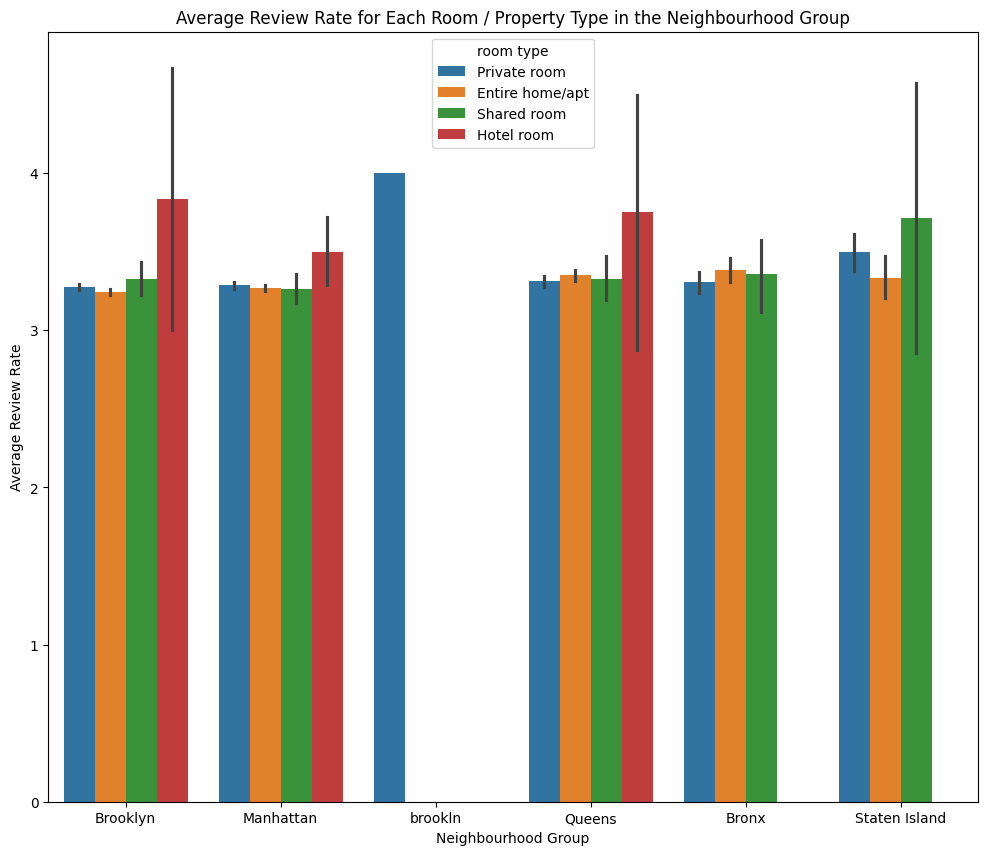

In [111]:
plt.figure(figsize = [12, 10])
sns.barplot(data = db, x = 'neighbourhood group', y = 'review rate number', hue = 'room type')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Review Rate')
plt.title('Average Review Rate for Each Room / Property Type in the Neighbourhood Group')
plt.show()

#### Are hosts with a higher calculated host listings count are likely to maintain higher availability throughout the year?


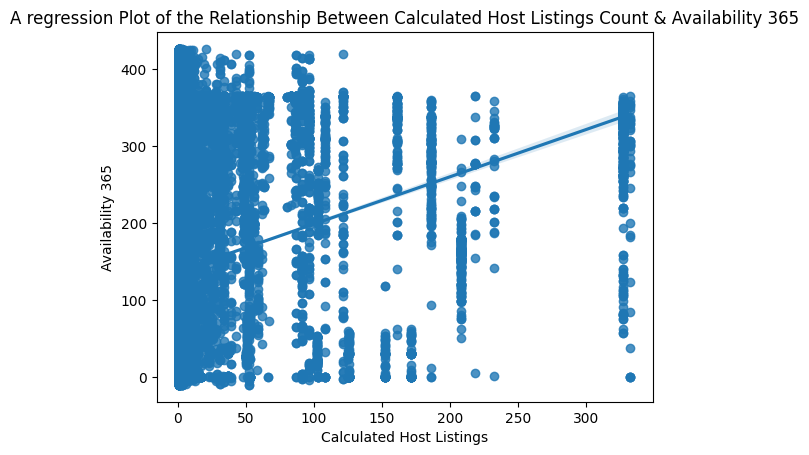

In [112]:
sns.regplot(db, x = 'calculated host listings count', y = 'availability 365')
plt.xlabel('Calculated Host Listings')
plt.ylabel('Availability 365')
plt.title('A regression Plot of the Relationship Between Calculated Host Listings Count & Availability 365')
plt.show()

In [114]:
db['calculated host listings count'].corr(db['availability 365'])


np.float64(0.13599714715703387)